# Deep Learning for Name Gender Classification

We have already seen the following code for partitioning the data of name gender classification and feature extraction. The code is changed slightly so that the labels are numerical (0 for male, 1 for female). This is the format required for Keras:

In [1]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to /Users/noah/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name,0) for name in m] +
         [(name,1) for name in f])
random.shuffle(names)
train_names = names[1000:]
devtest_names = names[500:1000]
test_names = names[:500]

In [3]:
def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result = [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i >= 0:
        result[i] = 1
    else:
        result[len(alphabet)] = 1 # character is out of the alphabet
    return result

def gender_features_n(word, n=2):
    "Return the one-hot encodings of the last n characters"
    features = []
    for i in range(n):
        if i < len(word):
            features = one_hot_character(word[-i-1]) + features
        else:
            features = one_hot_character(' ') + features
    return features

In [6]:
one_hot_character('a')

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
one_hot_character('z')

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [8]:
len(one_hot_character('z'))

27

In [4]:
gender_features_n("Mary", n=2)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [5]:
# Let's determine the number of features so that we can use this information when we design the neural network
len(gender_features_n("Mary", n=2))

54

## Exercise: Simple Neural Network
Design a simple neural network that has 54 input cells (that's the number of gender features for $n=2$, as we have seen above), and one output cell (without a hidden layer). The output cell will be used to classify the name between male (output=0) and female (output=1). This is therefore an instance of **binary classification**.

This simple model, without hidden layers, is equivalent to a **logistic regression** classifier. The model summary should look like this:

```
Layer (type)                 Output Shape              Param #   
=================================================================
dense_2 (Dense)              (None, 1)                 55        
=================================================================
Total params: 55
Trainable params: 55
Non-trainable params: 0
```


Compile the model and provide the right loss function. Use `'rmsprop'` as the optimiser, and include `'accuracy'` as an evaluation metric. 
Run the network **for 100 epochs** using batch size of 100, and observe the results. 

Answer the following questions:

1. What is the best result on the validation set?
2. At the epoch with best result on the validation set, what is the result on the training set?
3. Is the system overfitting? Justify your answer.
4. Do we really need 100 epochs? Do we need more than 100 epochs? would the system run better with less epochs?

In [9]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [55]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [56]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2022-04-12 14:20:09.835536: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-12 14:20:09.835573: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/noah/miniforge3/lib/python3.9/site-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [57]:
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers

In [58]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid',input_shape=(54,)))

In [59]:
from tensorflow.keras import optimizers
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 55        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [61]:
train_data = np.array([gender_features_n(name, n=2) for name, label in train_names])
train_labels = np.array([label for name, label in train_names])

devtest_data = np.array([gender_features_n(name, n=2) for name, label in devtest_names])
devtest_labels = np.array([label for name, label in devtest_names])

test_data = np.array([gender_features_n(name, n=2) for name, label in test_names])
test_labels = np.array([name for name, label in test_names])

In [62]:
history = model.fit(np.array(train_data),
                    train_labels,
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, devtest_labels))

Epoch 1/100


2022-04-12 14:23:55.716747: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-12 14:23:55.860790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 1s 6ms/step - loss: 0.7462 - accuracy: 0.3907 - val_loss: 0.7294 - val_accuracy: 0.4140
Epoch 2/100
24/70 [=========>....................] - ETA: 0s - loss: 0.7168 - accuracy: 0.4379

2022-04-12 14:23:56.922278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 0s 5ms/step - loss: 0.7085 - accuracy: 0.4533 - val_loss: 0.6961 - val_accuracy: 0.4960
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5660 - val_loss: 0.6681 - val_accuracy: 0.6580
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6789 - val_loss: 0.6441 - val_accuracy: 0.6860
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.6987 - val_loss: 0.6244 - val_accuracy: 0.6900
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6090 - accuracy: 0.7041 - val_loss: 0.6087 - val_accuracy: 0.6880
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5934 - accuracy: 0.7059 - val_loss: 0.5956 - val_accuracy: 0.6860
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5802 - accuracy: 0.7094 - val_loss: 0.5845 - val_accuracy: 0.7020
Epoch 9/100
70/70 [======

Epoch 60/100
70/70 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.7771 - val_loss: 0.4793 - val_accuracy: 0.7660
Epoch 61/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4426 - accuracy: 0.7782 - val_loss: 0.4793 - val_accuracy: 0.7660
Epoch 62/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4424 - accuracy: 0.7787 - val_loss: 0.4793 - val_accuracy: 0.7660
Epoch 63/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4422 - accuracy: 0.7782 - val_loss: 0.4792 - val_accuracy: 0.7660
Epoch 64/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4420 - accuracy: 0.7784 - val_loss: 0.4792 - val_accuracy: 0.7660
Epoch 65/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.7789 - val_loss: 0.4790 - val_accuracy: 0.7660
Epoch 66/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4417 - accuracy: 0.7792 - val_loss: 0.4790 - val_accuracy: 0.7660
Epoch 

In [64]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

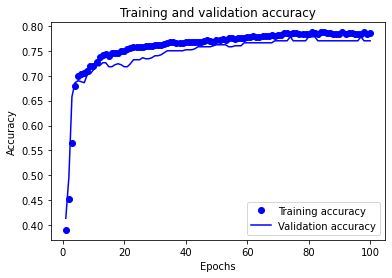

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    
plot_history(history)

*(Accuracy at the devtest set stalls at 70 epochs so we could have stopped there. At that point, accuracy is 0.77 whereas accuracy at train set is 0.7795. The difference is rather small, so it seems there is virtually no overfitting*).

## Exercise: A Deeper Network
Experiment with a network that has one hidden dense layer with a `'relu'` activation. The resulting system is no longer a logistic regression classifier, it's something more complex. Try the following sizes in the hidden layer:

* 5, 7, 10

Answer the following questions:

1. Which system performed best on the dev-test set?
2. Would you add more or less cells in the hidden layer? Justify your answer.
3. Is this system better than the simpler system of the previous exercise? Justify your answer.

In [66]:
model = models.Sequential()
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
history = model.fit(np.array(train_data),
                    train_labels,
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, devtest_labels))

Epoch 1/100


2022-04-12 14:25:42.772778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 1s 7ms/step - loss: 0.6891 - accuracy: 0.5376 - val_loss: 0.6757 - val_accuracy: 0.6100
Epoch 2/100
21/70 [========>.....................] - ETA: 0s - loss: 0.6737 - accuracy: 0.6352

2022-04-12 14:25:43.648657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.6560 - val_loss: 0.6535 - val_accuracy: 0.6620
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6427 - accuracy: 0.6574 - val_loss: 0.6322 - val_accuracy: 0.6620
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6204 - accuracy: 0.6610 - val_loss: 0.6110 - val_accuracy: 0.6620
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 0.5973 - accuracy: 0.6897 - val_loss: 0.5899 - val_accuracy: 0.6860
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5741 - accuracy: 0.7107 - val_loss: 0.5683 - val_accuracy: 0.6960
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5511 - accuracy: 0.7313 - val_loss: 0.5482 - val_accuracy: 0.7220
Epoch 8/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5291 - accuracy: 0.7431 - val_loss: 0.5302 - val_accuracy: 0.7400
Epoch 9/100
70/70 [======

Epoch 60/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4215 - accuracy: 0.7967 - val_loss: 0.4607 - val_accuracy: 0.7840
Epoch 61/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4213 - accuracy: 0.7961 - val_loss: 0.4604 - val_accuracy: 0.7840
Epoch 62/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.7958 - val_loss: 0.4605 - val_accuracy: 0.7840
Epoch 63/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.7961 - val_loss: 0.4605 - val_accuracy: 0.7840
Epoch 64/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4209 - accuracy: 0.7958 - val_loss: 0.4598 - val_accuracy: 0.7840
Epoch 65/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4209 - accuracy: 0.7964 - val_loss: 0.4597 - val_accuracy: 0.7840
Epoch 66/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4207 - accuracy: 0.7965 - val_loss: 0.4598 - val_accuracy: 0.7840
Epoch 

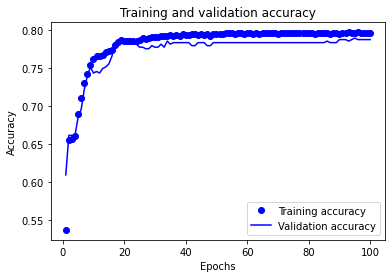

In [68]:
plot_history(history)

*(With hidden layer of size 5, the system achieved slightly better results after a few epochs. Again there isn't much overfitting at about 12 epochs, but as we increase the number of epochs beyond 12, overfitting increases.*)

In [69]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [70]:
history = model.fit(np.array(train_data),
                    train_labels,
                    epochs=200,
                    batch_size=100,
                    validation_data=(devtest_data, devtest_labels))

Epoch 1/200


2022-04-12 14:27:06.069199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 1s 6ms/step - loss: 0.6749 - accuracy: 0.5749 - val_loss: 0.6343 - val_accuracy: 0.6600
Epoch 2/200
22/70 [========>.....................] - ETA: 0s - loss: 0.6227 - accuracy: 0.6705

2022-04-12 14:27:06.816976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 0s 5ms/step - loss: 0.6013 - accuracy: 0.6861 - val_loss: 0.5812 - val_accuracy: 0.6840
Epoch 3/200
70/70 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7225 - val_loss: 0.5450 - val_accuracy: 0.7160
Epoch 4/200
70/70 [==============================] - 0s 5ms/step - loss: 0.5149 - accuracy: 0.7542 - val_loss: 0.5192 - val_accuracy: 0.7380
Epoch 5/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4871 - accuracy: 0.7671 - val_loss: 0.5018 - val_accuracy: 0.7560
Epoch 6/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.7676 - val_loss: 0.4907 - val_accuracy: 0.7600
Epoch 7/200
70/70 [==============================] - 0s 6ms/step - loss: 0.4555 - accuracy: 0.7686 - val_loss: 0.4849 - val_accuracy: 0.7520
Epoch 8/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4478 - accuracy: 0.7715 - val_loss: 0.4822 - val_accuracy: 0.7620
Epoch 9/200
70/70 [======

Epoch 60/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4162 - accuracy: 0.7968 - val_loss: 0.4551 - val_accuracy: 0.7800
Epoch 61/200
70/70 [==============================] - 0s 6ms/step - loss: 0.4159 - accuracy: 0.7969 - val_loss: 0.4543 - val_accuracy: 0.7840
Epoch 62/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4160 - accuracy: 0.7954 - val_loss: 0.4545 - val_accuracy: 0.7760
Epoch 63/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4159 - accuracy: 0.7977 - val_loss: 0.4546 - val_accuracy: 0.7820
Epoch 64/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4157 - accuracy: 0.7984 - val_loss: 0.4548 - val_accuracy: 0.7820
Epoch 65/200
70/70 [==============================] - 0s 6ms/step - loss: 0.4157 - accuracy: 0.7968 - val_loss: 0.4546 - val_accuracy: 0.7820
Epoch 66/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4155 - accuracy: 0.7985 - val_loss: 0.4545 - val_accuracy: 0.7820
Epoch 

70/70 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8004 - val_loss: 0.4515 - val_accuracy: 0.7840
Epoch 118/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8013 - val_loss: 0.4516 - val_accuracy: 0.7840
Epoch 119/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8010 - val_loss: 0.4515 - val_accuracy: 0.7860
Epoch 120/200
70/70 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8016 - val_loss: 0.4512 - val_accuracy: 0.7840
Epoch 121/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4116 - accuracy: 0.8000 - val_loss: 0.4516 - val_accuracy: 0.7840
Epoch 122/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4115 - accuracy: 0.8014 - val_loss: 0.4514 - val_accuracy: 0.7840
Epoch 123/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.8013 - val_loss: 0.4513 - val_accuracy: 0.7840
Epoch 124/200

70/70 [==============================] - 0s 5ms/step - loss: 0.4097 - accuracy: 0.8016 - val_loss: 0.4491 - val_accuracy: 0.7840
Epoch 175/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4097 - accuracy: 0.8011 - val_loss: 0.4490 - val_accuracy: 0.7840
Epoch 176/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4095 - accuracy: 0.8010 - val_loss: 0.4490 - val_accuracy: 0.7840
Epoch 177/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.8008 - val_loss: 0.4483 - val_accuracy: 0.7820
Epoch 178/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4096 - accuracy: 0.8013 - val_loss: 0.4485 - val_accuracy: 0.7840
Epoch 179/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4096 - accuracy: 0.8014 - val_loss: 0.4486 - val_accuracy: 0.7840
Epoch 180/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4096 - accuracy: 0.8016 - val_loss: 0.4488 - val_accuracy: 0.7840
Epoch 181/200

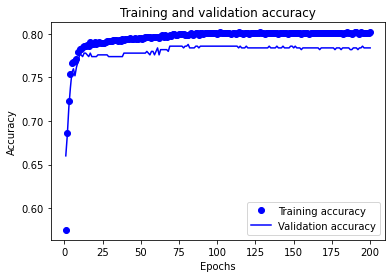

In [71]:
plot_history(history)

*(Results on the validation set did not improve. Let's try a middle value with 7 cells)*

In [72]:
model = models.Sequential()
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model.fit(np.array(train_data),
                    train_labels,
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, devtest_labels))

Epoch 1/100


2022-04-12 14:28:22.218325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 1s 7ms/step - loss: 0.6190 - accuracy: 0.6781 - val_loss: 0.5905 - val_accuracy: 0.7000
Epoch 2/100
20/70 [=======>......................] - ETA: 0s - loss: 0.5896 - accuracy: 0.6865

2022-04-12 14:28:22.967284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 0s 5ms/step - loss: 0.5716 - accuracy: 0.6937 - val_loss: 0.5540 - val_accuracy: 0.6980
Epoch 3/100
70/70 [==============================] - 0s 6ms/step - loss: 0.5351 - accuracy: 0.7425 - val_loss: 0.5259 - val_accuracy: 0.7460
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5061 - accuracy: 0.7598 - val_loss: 0.5066 - val_accuracy: 0.7480
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4846 - accuracy: 0.7648 - val_loss: 0.4934 - val_accuracy: 0.7580
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.7707 - val_loss: 0.4845 - val_accuracy: 0.7600
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4588 - accuracy: 0.7759 - val_loss: 0.4789 - val_accuracy: 0.7640
Epoch 8/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4513 - accuracy: 0.7765 - val_loss: 0.4758 - val_accuracy: 0.7760
Epoch 9/100
70/70 [======

Epoch 60/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4244 - accuracy: 0.7952 - val_loss: 0.4657 - val_accuracy: 0.7820
Epoch 61/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4243 - accuracy: 0.7949 - val_loss: 0.4654 - val_accuracy: 0.7820
Epoch 62/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4243 - accuracy: 0.7933 - val_loss: 0.4660 - val_accuracy: 0.7800
Epoch 63/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4240 - accuracy: 0.7951 - val_loss: 0.4655 - val_accuracy: 0.7820
Epoch 64/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4239 - accuracy: 0.7944 - val_loss: 0.4656 - val_accuracy: 0.7820
Epoch 65/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4238 - accuracy: 0.7944 - val_loss: 0.4658 - val_accuracy: 0.7800
Epoch 66/100
70/70 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.7936 - val_loss: 0.4655 - val_accuracy: 0.7800
Epoch 

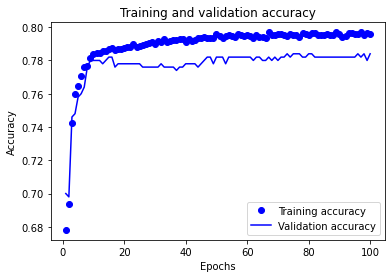

In [74]:
plot_history(history)

*(It seems that the ideal results were at 5 hidden cells. In none of the cases there was much overfitting.)*

# Optional: Deep Learning with the Movie Review Corpus

* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.